In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [3]:
def calculate_greeks(S, T, r, q, sigma, K):
    d1 = (np.log(S / K) + (r - q + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2=d1-sigma*np.sqrt(T)
    # Calculate delta for call option: e^(-qT) * N(d1)
    call_delta = np.exp(-q * T) * norm.cdf(d1)
    put_delta = np.exp(-q * T) * norm.cdf(d1) - np.exp(-q * T)
    gamma=np.exp(-q*T) * norm.pdf(d1)/(sigma * S * np.sqrt(T))
    vega=np.exp(-q*T) * S * np.sqrt(T) * norm.pdf(d1)
    theta=-np.exp(-q*T)*S*norm.pdf(d1)*sigma/(2*np.sqrt(T))+q*np.exp(-q*T)*S*norm.cdf(d1)-r*K*np.exp(-r*T)*norm.cdf(d2)
    return {'Call_Delta': call_delta, 'Put_Delta': put_delta,
            'Gamma': gamma, 'Vega': vega, 'Theta': theta}


In [4]:
# Black-Scholes parameters
S = 100  # Current stock price
T = 1.0  # Time to expiration (1 year)
r = 0.05  # Risk-free rate (5%)
q = 0.02  # Dividend yield (2%)
sigma = 0.2  # Volatility (20%)

# Range of strike prices
# K = np.linspace(50, 150, 100)  # Strike prices from 50 to 150
K = 100
S = np.linspace(50, 150, 100)

T_list=[0.05, 0.5, 1]
greeks_list=[calculate_greeks(S, T, r, q, sigma, K) for T in T_list]

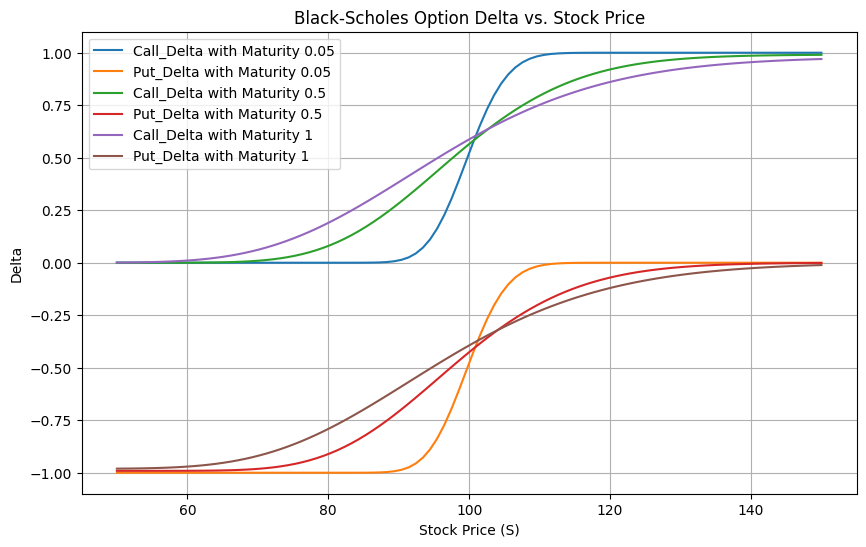

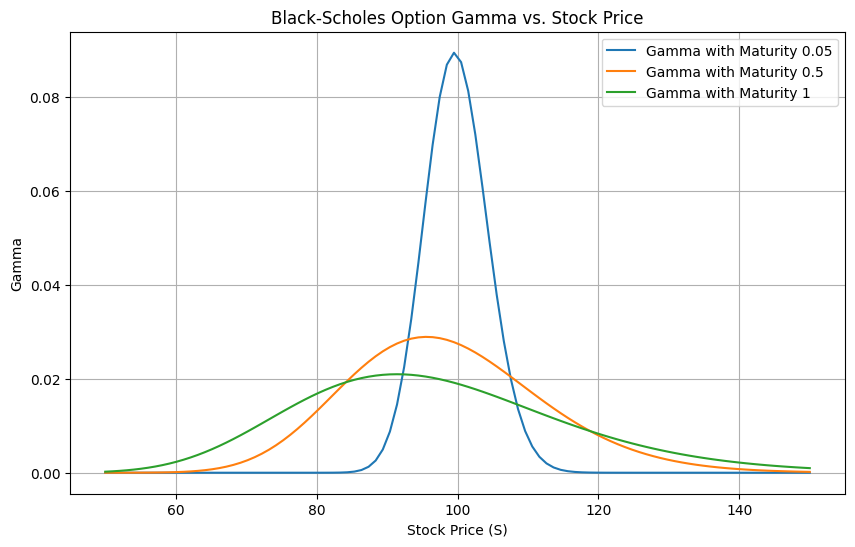

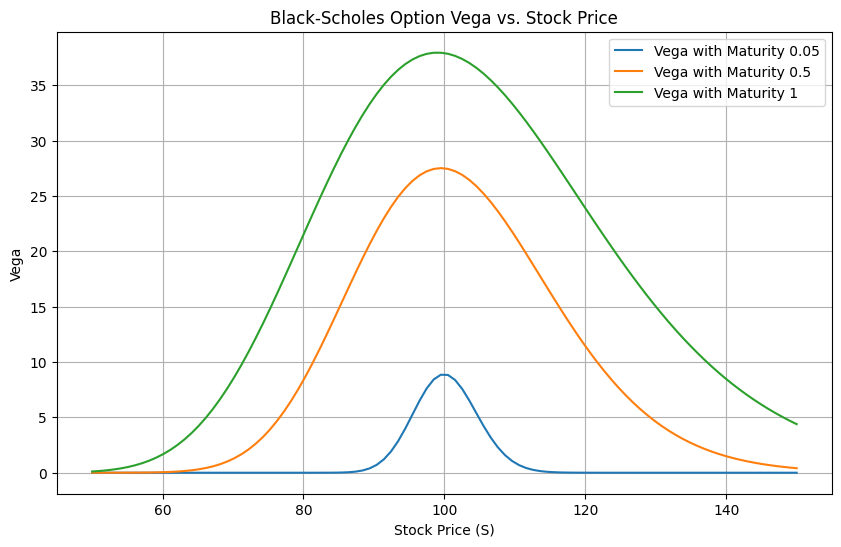

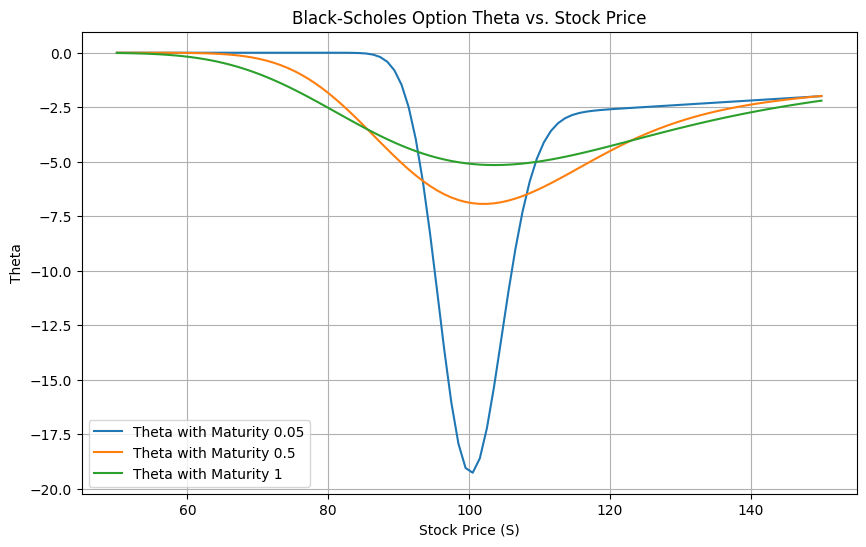

In [15]:
# Plotting
def plot_greeks_vs_S(keyword):
    plt.figure(figsize=(10, 6))
    for T, greeks in zip(T_list, greeks_list):
        for index, value in greeks.items():
                if keyword in index:
                    plt.plot(S, value, label=f'{index} with Maturity {T}')
    plt.xlabel('Stock Price (S)')
    plt.ylabel(keyword)
    plt.title(f'Black-Scholes Option {keyword} vs. Stock Price')
    plt.grid(True)
    plt.legend()
    plt.show()


keywords=['Delta', 'Gamma', 'Vega', 'Theta']
for keyword in keywords:
    plot_greeks_vs_S(keyword)

In [17]:
# Black-Scholes parameters
S = 100  # Current stock price
r = 0.05  # Risk-free rate (5%)
q = 0.02  # Dividend yield (2%)
sigma = 0.2  # Volatility (20%)

T = np.linspace(0.01, 1, 100)
K_list = [90, 100, 110]
greeks_list = [calculate_greeks(S, T, r, q, sigma, K) for K in K_list]

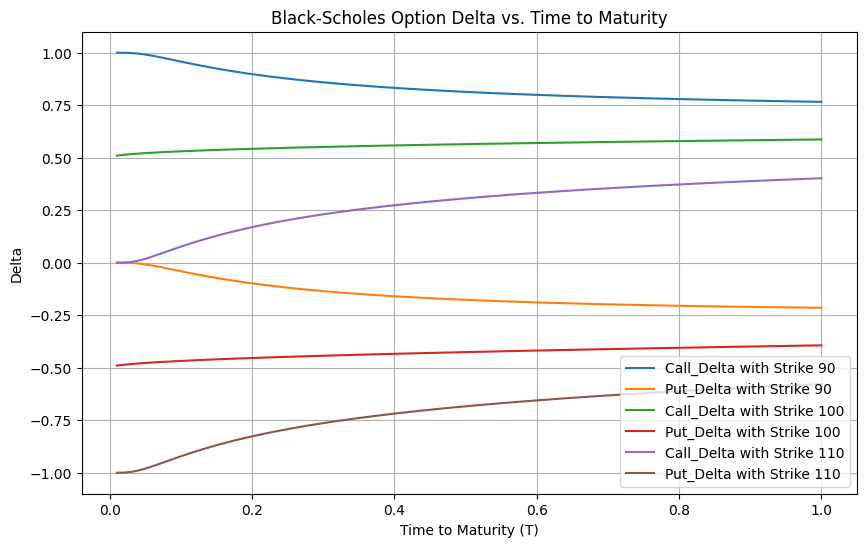

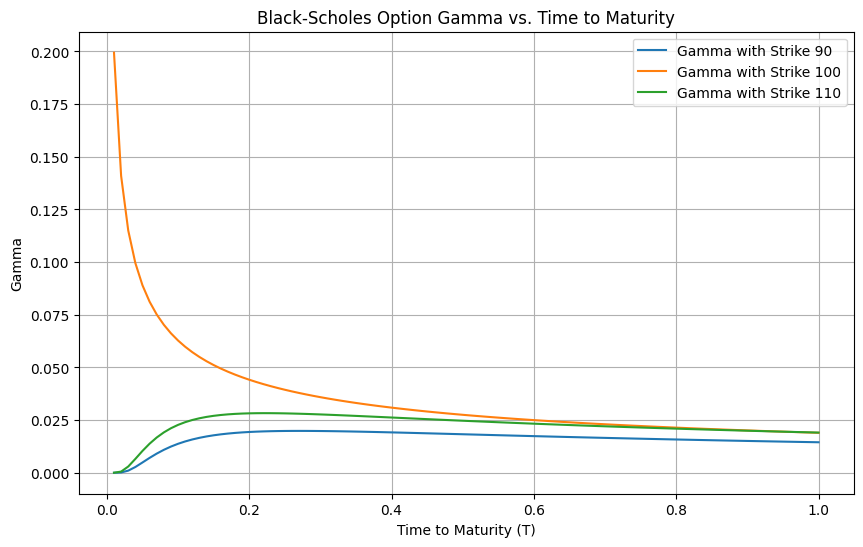

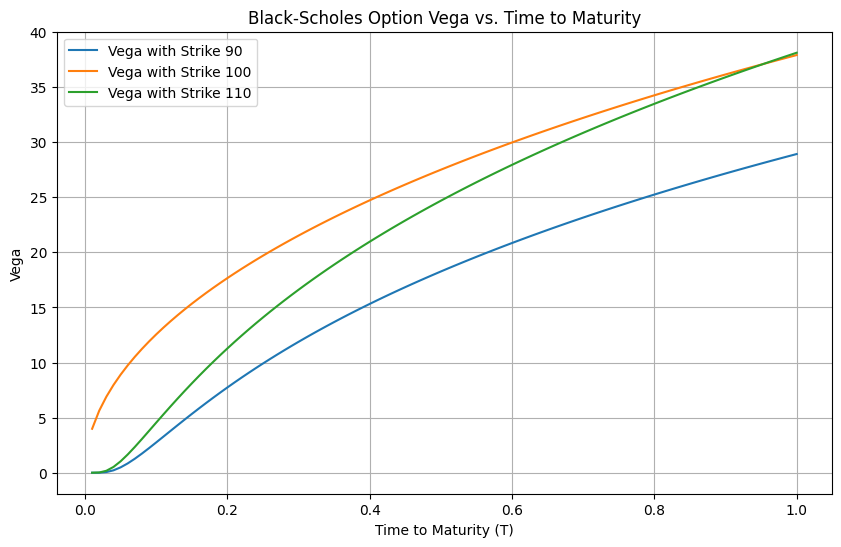

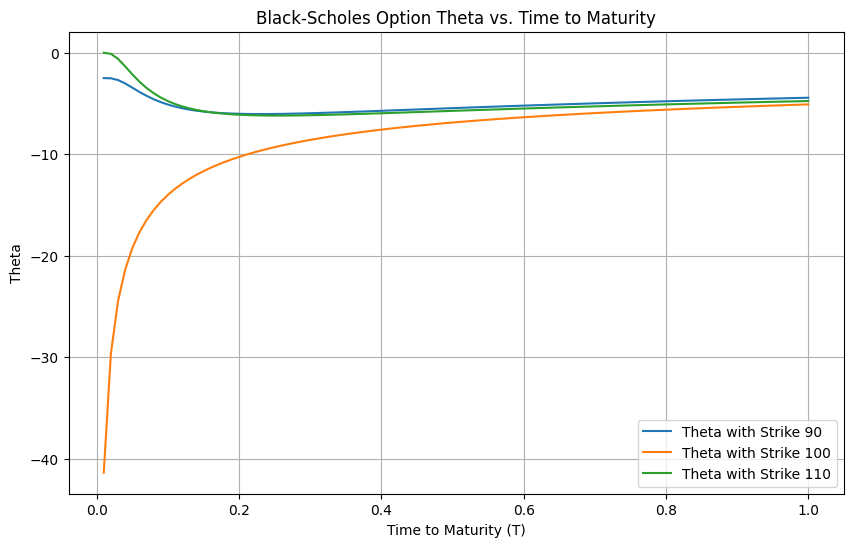

In [19]:
# Plotting
def plot_greeks_vs_S(keyword):
    plt.figure(figsize=(10, 6))
    for K, greeks in zip(K_list, greeks_list):
        for index, value in greeks.items():
            if keyword in index:
                plt.plot(T, value, label=f'{index} with Strike {K}')
    plt.xlabel('Time to Maturity (T)')
    plt.ylabel(keyword)
    plt.title(f'Black-Scholes Option {keyword} vs. Time to Maturity')
    plt.grid(True)
    plt.legend()
    plt.show()

keywords=['Delta', 'Gamma', 'Vega', 'Theta']
for keyword in keywords:
    plot_greeks_vs_S(keyword)